# Pizza Shop Location!

**Daggy1234**

_A data analysis_


### Introduction
---
New York has become in recent years, and due to its own excellence, the world’s most important economic and cultural capital. The city’s atmosphere and style of life are unique and they are best discovered by visiting and enjoying it in person.Over 50 million tourists visit this place each year.

Via  [Civitatis](https://www.introducingnewyork.com/)



### The Business Problem
---
There is a saturation of the pizza market in New York City.number of pizza places in New York City is likely to be between 2350 and 32,000. As an aspiring Pizzeria owner, you would like to find the right location for building your own pizzeria. Away from competition yet in a place where footfall ig good.

### Data Acquisition
---
New York has an official site for data [here](https://opendata.cityofnewyork.us/)
from which we can get a mojority of the data. We can use the google API for geospatial data not to mention the foursquare api for restaurant data.
We will also use a list of zip code regions to store data for regions. The data is here [link](https://www.geonames.org/postal-codes/US/NY/new-york.html)

### Data Description
---
All the data stated above will be ustilized to solve this problem and try to find the best location to open a resteraunt in a certain neighborhood

* GeoJson of boroughs
* Foursquare Data of all pizza places
* New York Zip Codes

In [262]:
#essential lubaries for this project
import pandas as pd
import numpy as nd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [263]:
#We will also read our credentials!
import yaml
with open('creds.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    file.close()
secret = config['secret']
id = config['id']

### Data Pre-Processing
---
We will aquire data from sources and store them in data frames to use.




In [264]:
df = pd.read_csv('usa_zipcode_of_ny-1551j.csv')
#dft = df[df['County Name'].str.contains(['NEW YORK','KINGS','BRONX','QUEENS','RICHMOND'],regex=False)]
df['County Name'].unique()

array(['ULSTER', 'GREENE', 'JEFFERSON', 'MONROE', 'STEUBEN', 'WARREN',
       'CHENANGO', 'ERIE', 'ALBANY', 'NASSAU', 'ORLEANS', 'ONEIDA',
       'GENESEE', 'ALLEGANY', 'CATTARAUGUS', 'SCHUYLER', 'SCHENECTADY',
       'OSWEGO', 'WAYNE', 'CLINTON', 'SUFFOLK', 'WESTCHESTER', 'DUTCHESS',
       'MONTGOMERY', 'COLUMBIA', 'DELAWARE', 'TIOGA', 'NIAGARA',
       'ONONDAGA', 'WYOMING', 'ORANGE', 'WASHINGTON', 'QUEENS',
       'CHAUTAUQUA', 'CAYUGA', 'RENSSELAER', 'LIVINGSTON', 'SARATOGA',
       'SULLIVAN', 'ROCKLAND', 'LEWIS', 'YATES', 'CHEMUNG', 'BROOME',
       'CORTLAND', 'ONTARIO', 'ESSEX', 'HAMILTON', 'FRANKLIN', 'MADISON',
       'SAINT LAWRENCE', 'PUTNAM', 'FULTON', 'BRONX', 'KINGS', 'TOMPKINS',
       'OTSEGO', 'SCHOHARIE', 'HERKIMER', 'SENECA', 'NEW YORK',
       'RICHMOND'], dtype=object)

In [265]:
# New york City has only 5 counties that matter so we will drop data from the rest of them
countylist = ['RICHMOND','NEW YORK','QUEENS','BRONX','KINGS']
df = df[df['County Name'].isin(countylist)]


df.reset_index(inplace=True)
df

,index,zip,Zipcode name,City,State,County Name
0,83,11692,"ARVERNE, NY",ARVERNE,NY,QUEENS
1,86,11102,"ASTORIA, NY",ASTORIA,NY,QUEENS
2,87,11103,"ASTORIA, NY",ASTORIA,NY,QUEENS
3,88,11105,"ASTORIA, NY",ASTORIA,NY,QUEENS
4,89,11106,"ASTORIA, NY",ASTORIA,NY,QUEENS
...,...,...,...,...,...,...
284,1792,10314,"STATEN ISLAND, NY",STATEN ISLAND,NY,RICHMOND
285,1818,11104,"SUNNYSIDE, NY",SUNNYSIDE,NY,QUEENS
286,2025,11357,"WHITESTONE, NY",WHITESTONE,NY,QUEENS
287,2047,11421,"WOODHAVEN, NY",WOODHAVEN,NY,QUEENS


In [266]:
latlo = pd.read_csv('us-zip-code-latitude-and-longitude.csv',sep=';')
latlo.rename(columns={'Zip':'zip'},inplace=True)
# latlo.drop(axis=1,columns=df['City','State','Timezone','Daylight savings time flag','geopoint'],inplace=True)
latlo

,zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,14043,Depew,NY,42.904958,-78.700600,-5,1,"42.904958,-78.7006"
1,13827,Owego,NY,42.120274,-76.258740,-5,1,"42.120274,-76.25874"
2,14739,Friendship,NY,42.192384,-78.143080,-5,1,"42.192384,-78.14308"
3,11703,North Babylon,NY,40.733398,-73.322570,-5,1,"40.733398,-73.32257"
4,11707,West Babylon,NY,40.922326,-72.637078,-5,1,"40.922326,-72.637078"
...,...,...,...,...,...,...,...,...
2276,11507,Albertson,NY,40.769942,-73.650040,-5,1,"40.769942,-73.65004"
2277,12979,Rouses Point,NY,44.990606,-73.370170,-5,1,"44.990606,-73.37017"
2278,13452,Saint Johnsville,NY,43.021223,-74.645370,-5,1,"43.021223,-74.64537"
2279,10211,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"


In [267]:
dm = df.merge(latlo,on='zip')
dm.drop(axis=1,columns=['index','Timezone','Daylight savings time flag','City_y','State_y','Zipcode name','geopoint'],inplace=True)
dm.rename(columns={'City_x':'Name','State_x':'state'},inplace=True)
dm

,zip,Name,state,County Name,Latitude,Longitude
0,11692,ARVERNE,NY,QUEENS,40.592939,-73.79568
1,11102,ASTORIA,NY,QUEENS,40.771286,-73.92462
2,11103,ASTORIA,NY,QUEENS,40.762968,-73.91091
3,11105,ASTORIA,NY,QUEENS,40.774686,-73.90816
4,11106,ASTORIA,NY,QUEENS,40.762012,-73.93147
...,...,...,...,...,...,...
281,10314,STATEN ISLAND,NY,RICHMOND,40.606337,-74.14513
282,11104,SUNNYSIDE,NY,QUEENS,40.743796,-73.91949
283,11357,WHITESTONE,NY,QUEENS,40.784453,-73.80922
284,11421,WOODHAVEN,NY,QUEENS,40.690870,-73.85828


#### DISCLAIMER
`Because of ratelimits in the 4square api and spam, rather than getting pizza places by zipcode. I will take advantage and get all pizza places by the central brough in NYC ie Brooklyn, Queens etc.This may reduce accuracy but with lat and long and zipcode we can gauge an accurate picture. Also we will sort by trending to optimise results`



In [268]:
plc = []
plz = []
pla = []
plo = []
#Brooklyn Manhattan Queens Staten
#40.8373 -73.886
latl = [40.6501,40.723663772,40.8373,40.579021,40.84985]
long = [-73.94958,-73.989829374,-73.886,-74.151535,-73.86641]
import time
import requests
for la,lo in zip(latl,long):
    url = f'https://api.foursquare.com/v2/venues/search?ll={la},{lo}&categoryId=4bf58dd8d48988d1ca941735&radius=14000&client_id={id}&client_secret={secret}&v=20200331'
    y = requests.post(url)
    r = y.json()
    try:
        l = r['response']['venues']
        for e in l:
            try:
                plz.append(e['location']['postalCode'])
                pla.append((e['location']['lat']))
                plo.append((e['location']['lng']))
                plc.append(e['name'])

            except KeyError:
                continue
    except KeyError:
        continue
    time.sleep(2.0)
pp = pd.DataFrame()
pp['name'] = plc
pp['zip'] = plz
pp['Latitude'] = pla
pp['Longitude'] = plo
pp

,name,zip,Latitude,Longitude
0,Joe's Pizza,10003,40.733234,-73.987672
1,Saraghina,11233,40.683590,-73.935340
2,Roberta's Take Out & Bakery,11206,40.704922,-73.934025
3,Champion Pizza,10019,40.766750,-73.982839
4,Sotto Le Stelle,11104,40.743424,-73.920165
...,...,...,...,...
145,Pizzeria Sirenetta,10024,40.788640,-73.974282
146,Pizza Garden,11358,40.758193,-73.795719
147,Sottocasa Pizzeria - Harlem,10027,40.805550,-73.947435
148,Zero Otto Nove,10458,40.854714,-73.888388


In [269]:
import json
with open('data.html') as file:
    pop = pd.read_html(file)
    file.close()
pop = pop[0]
pop.drop(axis=1,columns=['Unnamed: 0','City'],inplace=True)
pop = pop[pop['ZIP Code'].isin(df['zip'])]
pop.reset_index(inplace=True)
pop['ZIP Code'] = pop['ZIP Code'].astype(str)
pop.drop(axis=1,columns=['index'],inplace=True)
pop

,ZIP Code,Population Density
0,11109,142183
1,10028,123356
2,10023,122805
3,10075,119715
4,10128,116123
...,...,...
173,10306,7588
174,11693,6809
175,10314,5738
176,10020,5000


In [270]:
from sklearn import preprocessing
vc = pp['zip'].value_counts(ascending=True).rename_axis('Zipcode').reset_index(name='counts')
toporoc = vc[['counts']]
A = toporoc.values #returns an array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
fit = min_max_scaler.fit_transform(A)
x_scaled =  (1-fit)+1
normalized_dataframe = pd.DataFrame(x_scaled)
pizzazip = pd.merge(vc, normalized_dataframe, left_index=True, right_index=True)
pizzazip.drop(axis=1,columns=['counts'],inplace=True)
pizzazip.rename({0:'Score of Location based on no of pizza places','Zipcode':'zip'},axis=1,inplace=True)
pizzazip

,zip,Score of Location based on no of pizza places
0,11220,2.000000
1,07067,2.000000
2,07208,2.000000
3,10701,2.000000
4,10018,2.000000
...,...,...
57,10027,1.285714
58,11238,1.285714
59,11209,1.142857
60,10019,1.000000


In [271]:
pddb = pop[['Population Density']]
A = pddb.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
fit = min_max_scaler.fit_transform(A) + 1
pop['Population Normalised'] = fit
pizzapop = pop[['ZIP Code','Population Normalised']]
pizzapop.rename({'ZIP Code':'zip'},axis=1,inplace=True)
pizzapop

c:\users\arnav jindal\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,zip,Population Normalised
0,11109,2.000000
1,10028,1.862998
2,10023,1.858988
3,10075,1.836502
4,10128,1.810364
...,...,...
173,10306,1.020565
174,11693,1.014896
175,10314,1.007102
176,10020,1.001732


In [272]:
dm['zip'] = dm['zip'].astype(str)
fdf  = dm.merge(pizzapop,on='zip',how='left')
fdf  = fdf.merge(pizzazip,on='zip',how='left')
fdf.fillna(0,inplace=True)
fdf

,zip,Name,state,County Name,Latitude,Longitude,Population Normalised,Score of Location based on no of pizza places
0,11692,ARVERNE,NY,QUEENS,40.592939,-73.79568,1.129303,0.000000
1,11102,ASTORIA,NY,QUEENS,40.771286,-73.92462,1.324776,1.857143
2,11103,ASTORIA,NY,QUEENS,40.762968,-73.91091,1.364995,1.857143
3,11105,ASTORIA,NY,QUEENS,40.774686,-73.90816,1.128226,1.857143
4,11106,ASTORIA,NY,QUEENS,40.762012,-73.93147,1.328640,1.571429
...,...,...,...,...,...,...,...,...
281,10314,STATEN ISLAND,NY,RICHMOND,40.606337,-74.14513,1.007102,1.857143
282,11104,SUNNYSIDE,NY,QUEENS,40.743796,-73.91949,1.471624,1.000000
283,11357,WHITESTONE,NY,QUEENS,40.784453,-73.80922,1.069298,0.000000
284,11421,WOODHAVEN,NY,QUEENS,40.690870,-73.85828,1.195523,0.000000


In [273]:
#with our processed and ready data we can now take the sum of our colums by zipcode and get a final craph
dftp = fdf[['Population Normalised','Score of Location based on no of pizza places']]
fc = dftp.sum(axis=1)

dftp['score'] = fc
dftp['zip'] = fdf['zip']
dftp

<ipython-input-273-cfc9a2c241bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftp['score'] = fc
<ipython-input-273-cfc9a2c241bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftp['zip'] = fdf['zip']


,Population Normalised,Score of Location based on no of pizza places,score,zip
0,1.129303,0.000000,1.129303,11692
1,1.324776,1.857143,3.181919,11102
2,1.364995,1.857143,3.222138,11103
3,1.128226,1.857143,2.985369,11105
4,1.328640,1.571429,2.900068,11106
...,...,...,...,...
281,1.007102,1.857143,2.864245,10314
282,1.471624,1.000000,2.471624,11104
283,1.069298,0.000000,1.069298,11357
284,1.195523,0.000000,1.195523,11421



### Data Visualisation
-----
We now have all of our data and we will now plot a few maps.
* Population of New York Chloropleth
* Plot all Pizza Places on a map
* Get No of pizza places by zipcode



In [274]:
import folium
nyp = folium.Map(
    location = [ 40.730610, -73.935242],
    zoom_start = 10,
    tiles='Stamen Toner')

for lat,long,b in zip(pp['Latitude'],pp['Longitude'],pp['name']):
    label = '{}'.format(b)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,long],
    radius=3,
    popup=label,
    color='blue',
    fill=False,
    fill_color='#3186cc',
    fill_opacity=1.0,
    parse_html=False).add_to(nyp)
nyp


In [275]:
geo_data = 'ZIP_CODE_040114.json'
m = folium.Map(
    location = [ 40.730610, -73.935242],
    zoom_start = 10)

#
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=dftp,
    columns=['zip', 'score'],
    key_on='properties.postalCode',
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Relative Score of Pizza Zipcode'
).add_to(m)

# folium.LayerControl().add_to(m)
#


# folium.GeoJson(
#     geo_data
#
# ).add_to(m)
folium.LayerControl().add_to(m)

m

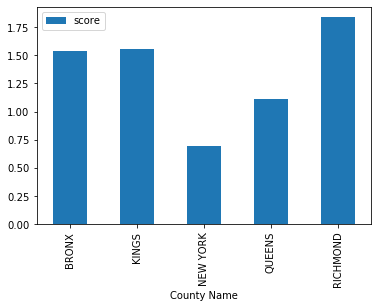

In [276]:
#Lets also See how each of New York's Boroughs Compares in relative mean score!
toplobor = dftp[['zip','score']]
toplobor = toplobor.merge(fdf,on='zip')
ftoplo = toplobor.groupby(axis=0,by='County Name').mean()
ax = ftoplo.plot(kind='bar',y='score')


In [277]:
#Lets see the top counties
toplobor.sort_values(by=['score'],inplace=True,ascending=False)
toplobor.reset_index(inplace=True)
top10 = toplobor[:10]
top10

,index,zip,score,Name,state,County Name,Latitude,Longitude,Population Normalised,Score of Location based on no of pizza places
0,141,10016,3.749682,NEW YORK,NY,NEW YORK,40.746180,-73.97759,1.749682,2.000000
1,150,10025,3.600930,NEW YORK,NY,NEW YORK,40.798502,-73.96811,1.743787,1.857143
2,137,10011,3.544065,NEW YORK,NY,NEW YORK,40.741012,-74.00012,1.544065,2.000000
3,149,10024,3.525214,NEW YORK,NY,NEW YORK,40.786387,-73.97709,1.668071,1.857143
4,201,10128,3.524649,NEW YORK,NY,NEW YORK,40.781894,-73.95039,1.810364,1.714286
5,129,10002,3.509845,NEW YORK,NY,NEW YORK,40.717040,-73.98700,1.652702,1.857143
6,54,11220,3.390428,BROOKLYN,NY,KINGS,40.641436,-74.01574,1.390428,2.000000
7,165,10040,3.327256,NEW YORK,NY,NEW YORK,40.858704,-73.92853,1.612970,1.714286
8,35,11201,3.290189,BROOKLYN,NY,KINGS,40.695286,-73.98907,1.290189,2.000000
9,130,10003,3.275135,NEW YORK,NY,NEW YORK,40.732509,-73.98935,1.703706,1.571429


In [278]:
top10s = top10.set_index('zip')['score']
top10s

zip
10016    3.749682
10025    3.600930
10011    3.544065
10024    3.525214
10128    3.524649
10002    3.509845
11220    3.390428
10040    3.327256
11201    3.290189
10003    3.275135
Name: score, dtype: float64

In [279]:
#Lets put the Top 10 Places on a map!
import branca
top10s = top10.set_index('zip')['score']
colorscale = branca.colormap.linear.YlOrRd_09.scale(0,1)
geo_data = 'ZIP_CODE_040114.json'
m = folium.Map(
    location = [ 40.730610, -73.935242],
    zoom_start = 10)
def style_function(feature):
    employed = top10s.get(feature['properties']['postalCode'], None)
    if employed is None:
        col = '#black'
    else:
        col = colorscale(employed)
    return {
        'fillOpacity': 1,
        'weight': 0,
        'fillColor': col
    }
folium.GeoJson(
    geo_data,
    style_function=style_function
).add_to(m)
m
#

### Accredition
---
I will now link my report/ presentation

